$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 10} $$

$$ \text{Practical I.I.R. filter design}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

In [2]:
% pylab inline
from scipy.signal import *
def pol2cart(r,theta):
    return r*cos(theta), r*sin(theta)

thetas = linspace(0,2*np.pi,100)
[xx, yy]= pol2cart(1,thetas)

Populating the interactive namespace from numpy and matplotlib


# Overiew

* Analog Butterworth Filters
* Bilinear transformation: Analog to Digital
* Design using Python
* Implementation 


# Predefined Pole Locations

- Continuous time filters have specific pole locations and frequency response characteristics.

- There exists many studies on Analog Filter design using polynomials.

- Digital Filter design only maps $s$-plane to $z$-plane (or variable).


# Analog Butterworth filters

- Take their name from ...
- Also known as maximally flat magnitude filters
- In $s$-plane (continuous time), low pass filter (with $\omega_c =1$ rad/s) forms the prototype of the filter.
- Continuous time form of the Nth order Butterworth Lowpass filter can be generated by:
        B, A = butter(N, wc,analog = True)
* B and A are the coefficient vectors of descending orders of variable s. 
* $\omega_c$ can have values from 0 to infinity.


## Example 1:
    
- Generate a 1st order Analog Butterworth filter with $\omega_c $= 10 rad/s. Refering to numerator and denumarator polynomials, we will plot the pole-zero map of the system.

In [3]:
B,A = butter(1,10,analog=True)
print 'B=',B
print 'A=',A

B= [ 10.]
A= [  1.  10.]


The outputs of the *butter* function for continuous time gives the numerator and denumerator coefficients of powers of $s$ in descending order. That is, the right most side of the vector elements correspond to the coefficients of $s^0$. Thus, the generated system is:

$$ H(s) = \frac{10s^0}{1s^1 + 10s^0}=\frac{10}{s+10} $$

with $\omega_c$ = 10 rad/s.

The system has a single pole located at $s=-10$.

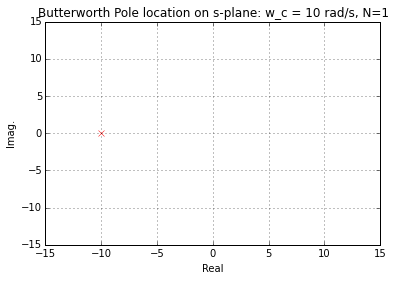

In [4]:
plot(-10,0,'rx')
axis([-15,15,-15,15])
grid(True)
xlabel('Real')
ylabel('Imag.')
title('Butterworth Pole location on s-plane: w_c = 10 rad/s, N=1')


## Example 2

Also generate 2nd and 3rd order Analog Butterworth filter with  $\omega_c$ = 10 rad/s and plot the pole-zero map of the systems.

In [5]:
B2,A2 = butter(2,10,analog=True)
B3,A3 = butter(3,10,analog=True)
print 'B2=',B2
print 'A2=',A2
print "and"

print 'B3=',B3
print 'A3=',A3

B2= [ 100.]
A2= [   1.           14.14213562  100.        ]
and
B3= [ 1000.]
A3= [   1.   20.  200. 1000.]


Generated systems are:

$$H_2(s) = \frac{100}{s^2 +14.14s+100} $$

$$H_3(s) = \frac{1000}{s^3+20s^2 +200s+1000} $$

We can find the pole locations by deriving the roots of the denumerator polynomials. We can use *roots()* command.

In [6]:
polesH2 = roots(A2)
polesH3 = roots(A3)
print "Poles of H2 are", polesH2
print "Poles of H3 are", polesH3


Poles of H2 are [-7.07106781+7.07106781j -7.07106781-7.07106781j]
Poles of H3 are [-10.+0.j          -5.+8.66025404j  -5.-8.66025404j]


If we plot the poles, the result is interesting...

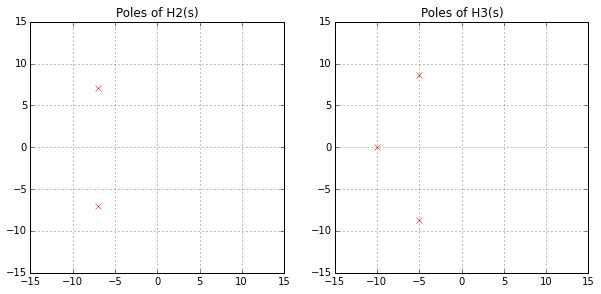

In [18]:
rcParams['figure.figsize']=(10,4.5)
subplot(1,2,1)
plot(real(polesH2),imag(polesH2),'rx')
axis([-15,15,-15,15])
grid(True)
title('Poles of H2(s)')
subplot(1,2,2)
plot(real(polesH3),imag(polesH3),'rx')
axis([-15,15,-15,15])
grid(True)
title('Poles of H3(s)')

If we check the norms of each pole:

In [8]:
print "Norms of H2 poles are ", abs(polesH2)
print "Norms of H3 poles are ", abs(polesH3)

Norms of H2 poles are  [ 10.  10.]
Norms of H3 poles are  [ 10.  10.  10.]


We see that they all have the same norm, meaning that
    - they have the same distance to origin
    - they are located on r =10 circle, which is the value of $\omega_c$.

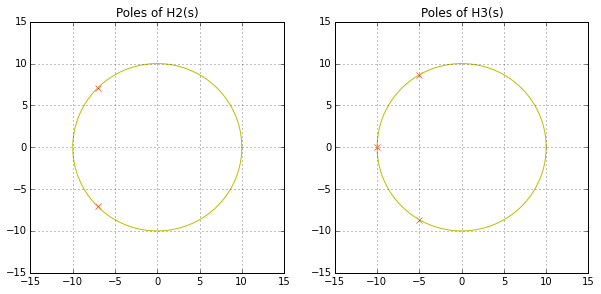

In [17]:
rcParams['figure.figsize']=(10,4.5)
subplot(1,2,1)
plot(real(polesH2),imag(polesH2),'rx')
hold(True)
plot(10*xx,10*yy,'-y')
axis([-15,15,-15,15])
grid(True)
title('Poles of H2(s)')
subplot(1,2,2)
plot(real(polesH3),imag(polesH3),'rx')
hold(True)
plot(10*xx,10*yy,'-y')
axis([-15,15,-15,15])
grid(True)
title('Poles of H3(s)')

### Butterworth Polynomials

- $N^{th}$ order Butterworth filter has $N$ poles on the left $s$-plane and each are seperated by $\pi /N $ radians with $s$= -1 being the symmetrical point.


- These poles are the roots of Butterworth polynomials.



- $\omega_c$ determines the circle radius of the pole locations


$$ s_p = -10 \to H(s)=\frac{G}{s+10} $$

$$ s_{p_1,\ p_2} = 10e^{j\ \left(\pi \pm \pi/4 \right)}  \to H(s)=\frac{G}{s^2 + 10\sqrt{2}s + 100} $$

$$ s_{p_1,\ p_2,\ p_3} = -10 \text{ and } 10e^{j\ \left(\pi \pm \pi/3 \right)}  \to H(s)=\frac{G}{(s+10)(s^2 + 10s + 100)} $$

### Order vs. Magnitude reponse revisited...

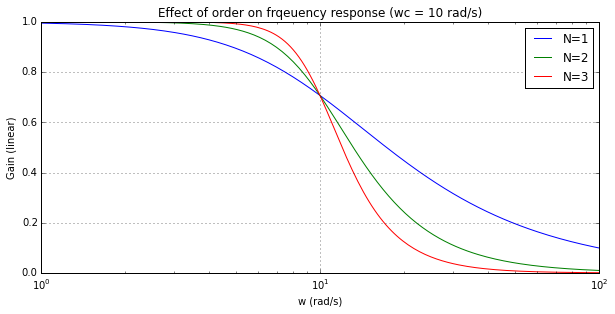

In [28]:
w, Hw = freqs(B,A)
w, Hw2 = freqs(B2,A2)
w, Hw3 = freqs(B3,A3)

semilogx(w,abs(Hw))
grid(True)
hold(True)
plot(w,abs(Hw2))
plot(w,abs(Hw3))
xlabel('w (rad/s)')
title('Effect of order on frqeuency response (wc = 10 rad/s)')
ylabel('Gain (linear)')
legend(('N=1','N=2','N=3'))

# Transformation from analog to digital: s $ \to$ z

- The Laplace transform of a continuous time signal $x(t)$ is:

$$X(s) = \int_{-\inf}^{+\inf} x(t) e^{-st}\, dt $$

and Z transform of a discrete time signal $x(n)$ is:

$$ X(z) = \sum_{n=-\inf}^{+\inf} x(n) z^{-n} $$

By putting $ t = nT_{sampling} $:

$$ e^{-\ s n T_{sampling} } = z^{-n} $$

$$ e^{\ s T_{sampling} } = z $$

or

$$ s= \frac{1}{T_{sampling}} ln(z) $$

By expansion in series,

$$ s= \frac{2}{T_{sampling}} \left( \frac{z-1}{z+1} + \frac{1}{3} \left( \frac{z-1}{z+1} \right)^3 + \frac{1}{5} \left( \frac{z-1}{z+1} \right)^5 + \dots \right) $$

$$ s \approx \frac{2}{T_{sampling} } \left( \frac{z-1}{z+1} \right) $$
$$ s \approx \frac{2}{T_{sampling}} \left( \frac{1-z^{-1}}{1+z^{-1}} \right) $$

This transformation is called the **Bilinear Transformation** .

***

$$ s= \sigma + j\omega    \to  z = r e^{j\Omega} $$

By putting 

$$ s = \frac{2}{T_{sampling} } \left( \frac{z-1}{z+1} \right) $$

we have

$$ \sigma + j\omega = \frac{2}{T_{sampling}} \left( \frac{r e^{j\Omega}-1 }{r e^{j\Omega}+1} \right)  $$

$$ \                = \frac{2}{T_{sampling}} \left( \frac{r e^{j\Omega}-1 }{r e^{j\Omega}+1} \right)  $$

we obtain 

$$ \sigma = \frac{2}{T_{sampling}} \left( \frac{r^2 -1}{r^2+2rcos(\Omega ) +1 } \right) \text{ and } \omega =   \frac{2}{T_{sampling}} \left( \frac{2rsin(\Omega)}{r^2+2rcos(\Omega ) +1 } \right)$$

For frequency response, we take r=1, so
$$ \omega =   \frac{2}{T_{sampling}} \left( \frac{sin(\Omega)}{1+cos(\Omega ) } \right) = \frac {2}{T_{sampling}} tan( \frac{\Omega}{2}) $$

or

$$ \Omega = 2\ \ tan^{-1} \left( \frac{\omega T_{sampling}} {2} \right) $$
***
 



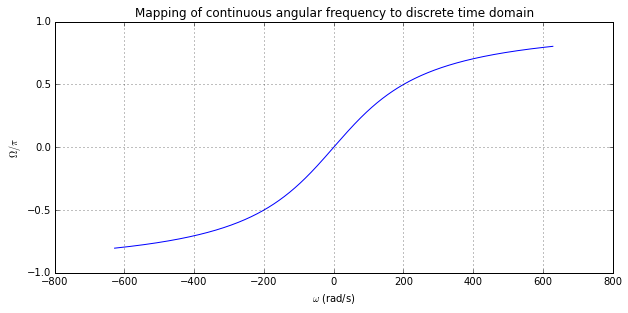

In [41]:
w= linspace(-100*2*pi,100*2*pi,1000) # continuous f from -1000 to 1000 Hz
Ts = 1 / 100.0                       # fs = 100 Hz
discrete_w = 2*arctan(w*Ts/2.0)

plot(w,discrete_w/pi)
ylabel('$\Omega / \pi$')
grid(True)
xlabel('$\omega$ (rad/s) ')
title('Mapping of continuous angular frequency to discrete time domain ')

## Design of Digital Butterworth Filters



**First Order:**

By applying bilinear transformation to first order lowpass Butterworth filter

$$ H(s) = \frac{10}{s+10} $$

with $f_s$ = 100 Hz, we obtain

$$ H(z) = \frac{10}{\frac{2}{T_s}\left(\frac{1-z^{-1}}{1+z^{-1}}\right) +10} = \frac{1} { \left( \frac {20-20 z^{-1} } {1 + z^{-1}} \right) + 1} = \frac {1} { \frac {21-19z^{-1} } { 1 + z^{-1} }} $$


$$ H(z) = \frac { \frac{1}{21} (1+z^{-1})}{1 - \frac{19}{21}z^{-1}} $$

Calculations get more complex as the order increases. For design purposes, algorithms are developed to prevent complex calculations. 

** Design using (digital) *butter()* function: **

- To obtain a digital Butterworth filter with order 1 and $\omega_c$ = 10 and $f_s$=100 Hz,

  b,a = butter(order, $\Omega_c / \pi$, *analog=False*)
  
  where $\Omega_c = \frac{\omega_c}{f_s}$


In [46]:
# Digital Butterworth Filter design

N = 1            # order = 1.
wc = 10          # Cut-off frequency is 10 rad/s.
fs = 100.0       # Sampling frequency is 100 Hz.
Omega = wc/fs

b, a = butter(N, Omega/pi)

print "  Numerator Coefficients are: ", b
print "Denumerator Coefficients are: ", a


  Numerator Coefficients are:  [ 0.04765688  0.04765688]
Denumerator Coefficients are:  [ 1.         -0.90468625]


we see that :

In [53]:
print "1/21.0 equals " , 1/21.0   
print "19/21.0 equals " , 19/21.0 

1/21.0 equals  0.047619047619
19/21.0 equals  0.904761904762


** Second order lowpass Butterworth filter: **

We will increase the order by one.
* order = 2
* $\omega_c$ = 10 rad/s
* $f_s$ = 100 Hz

and plot its frequency response.


In [60]:
# Digital Butterworth Filter design

N = 2            # order = 2.
wc = 10          # Cut-off frequency is 10 rad/s.
fs = 100.0       # Sampling frequency is 100 Hz.
Omega = wc/fs

b2, a2 = butter(N, Omega/pi)

print "  Numerator Coefficients are: ", b2
print "Denumerator Coefficients are: ", a2


  Numerator Coefficients are:  [ 0.00233321  0.00466642  0.00233321]
Denumerator Coefficients are:  [ 1.         -1.85879092  0.86812375]


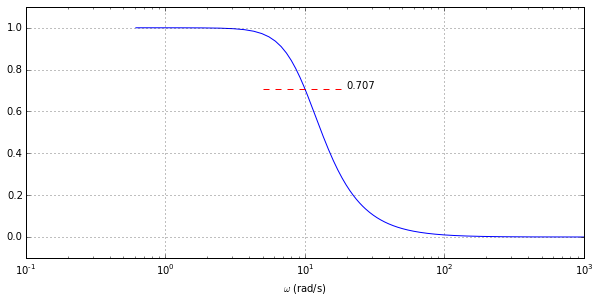

In [85]:
Omega, H = freqz(b2,a2)
w = 2*tan(Omega/2)*fs
semilogx(w,abs(H))
hold(True)
plot([5,20],[0.707,0.707],'--r')
text(20,0.707,'0.707')
grid(True)
ylim([-.1, 1.1])
xlim([.1 ,1000])
xlabel('$\omega$ (rad/s)')

As the figure reveal, the digital filter has a cut-off frequency of $w_c$ = 10 rad/s.